In [1]:
#Gradient Descent

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits import mplot3d
%matplotlib inline  

In [80]:
data_df = pd.read_csv('RegData.csv', names=['X','y'])
#data_df.head()
data_df.shape

(13, 2)

In [81]:
n_rows = data_df.shape[0]

In [82]:
X=data_df['X'].to_numpy().reshape(n_rows,1)
ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=data_df['y'].to_numpy().reshape(n_rows,1)

In [83]:
X.shape, y.shape

((13, 2), (13, 1))

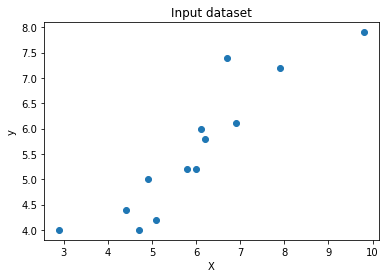

In [84]:
plt.scatter(x=data_df['X'], y=data_df['y'])
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');

In [85]:
def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [86]:
compute_cost(X,y)

array([16.30538448])

In [87]:
def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=50):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
#         print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0][0])
        theta1_history.append(theta[1][0])
        J_history.append(compute_cost(X,y,theta)[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [88]:
#it is important to know that smaller the alpha is  more clear the plot of thetas will be -> the plots will be obvious square
# because we take alot of points # the plot represents its half because it will not over shoot its minimum

In [89]:
%%time
num_iterations=1000
theta_init=np.array([[0],[0]])
alpha=0.001
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

Wall time: 118 ms


In [90]:
theta

array([[0.22697047],
       [0.88319924]])

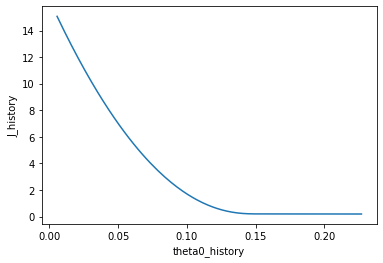

In [91]:
fig, ax1 = plt.subplots()
ax1.set_ylabel("J_history")
ax1.set_xlabel("theta0_history")
plt.plot(theta0_history,J_history )


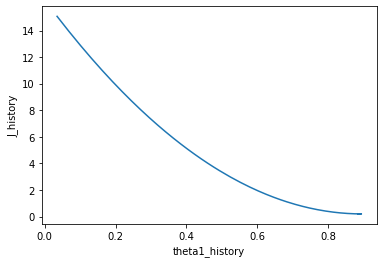

In [92]:
fig, ax1 = plt.subplots()
ax1.set_ylabel("J_history")
ax1.set_xlabel("theta1_history")
plt.plot(theta1_history,J_history )

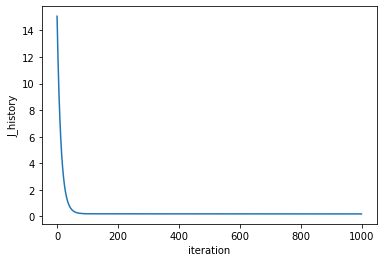

In [93]:
fig, ax1 = plt.subplots()
ax1.set_ylabel("J_history")
ax1.set_xlabel("iteration")
plt.plot(J_history )


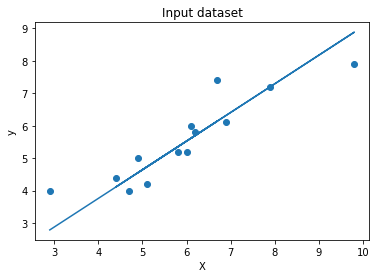

In [94]:
plt.scatter(x=data_df['X'], y=data_df['y'])
plt.plot( data_df['X'] , theta[1]*data_df['X']+theta[0] )
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');

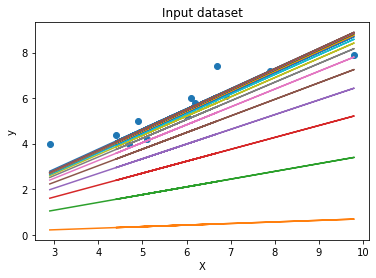

In [95]:
plt.scatter(x=data_df['X'], y=data_df['y'])
plt.plot( data_df['X'] , theta[1]*data_df['X']+theta[0] )
for i in range(1, 150 ,10):
    plt.plot( data_df['X'] , theta1_history[i]*data_df['X']+theta0_history[i] )
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');

In [96]:
#mini batch without shufflinf the data

In [97]:
x_new=np.linspace(0,20).reshape(50,1)

In [98]:
ones = np.ones((50,1))
X = np.concatenate((ones, x_new), axis=1)
y= -2*x_new + 1

In [101]:
%%time
num_iterations=50
theta_init=np.array([[0],[0]])
alpha=0.0001
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

Wall time: 7.64 ms


In [102]:
theta

array([[-0.06894938],
       [-0.94670779]])

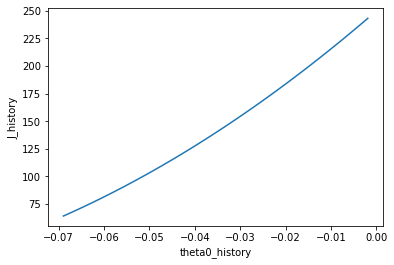

In [103]:
fig, ax1 = plt.subplots()
ax1.set_ylabel("J_history")
ax1.set_xlabel("theta0_history")
plt.plot(theta0_history,J_history )


In [104]:
theta0_history

[-0.0019,
 -0.0037738712244897955,
 -0.005621967565772178,
 -0.007444638123113142,
 -0.009242227267657686,
 -0.011015074706466399,
 -0.012763515545684754,
 -0.014487880352856858,
 -0.016188495218395226,
 -0.017865681816218035,
 -0.01951975746356511,
 -0.021151035180003774,
 -0.022759823745635562,
 -0.024346427758514564,
 -0.025911147691288116,
 -0.027454279947070382,
 -0.02897611691455917,
 -0.03047694702240628,
 -0.03195705479285145,
 -0.033416720894629916,
 -0.034856222195163405,
 -0.03627583181204424,
 -0.03767581916382219,
 -0.039056450020103446,
 -0.040417986550971084,
 -0.04176068737573619,
 -0.04308480761102869,
 -0.04439059891823687,
 -0.0456783095503044,
 -0.04694818439789349,
 -0.04820046503492291,
 -0.04943538976348915,
 -0.05065319365817928,
 -0.05185410860978359,
 -0.05303836336841618,
 -0.0542061835860516,
 -0.055357791858485335,
 -0.05649340776672596,
 -0.05761324791782678,
 -0.058717525985164346,
 -0.05980645274817156,
 -0.060880236131532546,
 -0.06193908124384673,
 -0.

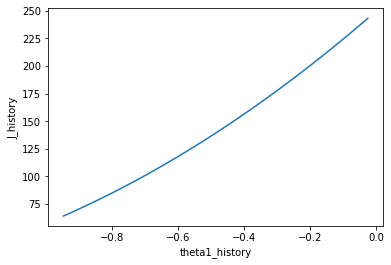

In [105]:
fig, ax1 = plt.subplots()
ax1.set_ylabel("J_history")
ax1.set_xlabel("theta1_history")
plt.plot(theta1_history,J_history )

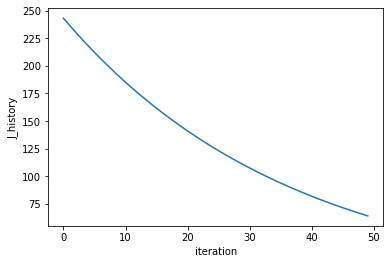

In [106]:
fig, ax1 = plt.subplots()
ax1.set_ylabel("J_history")
ax1.set_xlabel("iteration")
plt.plot(J_history )


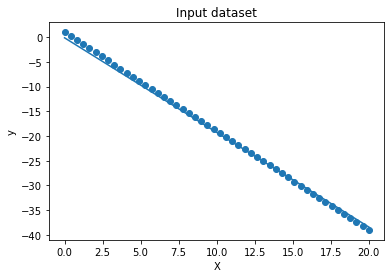

In [58]:
plt.scatter(x=X[:,1], y= y )
plt.plot( X[:,[1]] , theta[1]* X[:,1]+theta[0] )
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');

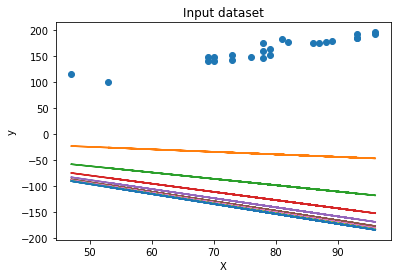

In [64]:
plt.scatter(x=X[:,1], y=y)
plt.plot( X[:,1] , theta[1]* X[:,1] +theta[0] )
for i in range(1, 50 ,5):
    plt.plot( X[:,1] , theta1_history[i]* X[:,1] +theta0_history[i] )
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');

In [65]:
#multible

In [66]:
data_df = pd.read_csv('MultipleLR.csv', names=['a','b','c','d'])
n_rows = data_df.shape[0]
X=data_df[['a','b','c']].to_numpy().reshape(n_rows,3)
ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=data_df['d'].to_numpy().reshape(n_rows,1)

In [67]:
X.shape, y.shape

((25, 4), (25, 1))

In [68]:
def compute_cost(X, y, theta=np.array([[0],[0],[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    
    # reshape theta
    theta=theta.reshape(4,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [69]:
compute_cost(X,y)

array([13405.98])

In [70]:
X.shape , theta.shape

((25, 4), (2, 1))

In [71]:
def gradient_descent(X, y, theta=np.array([[0],[0],[0],[0]]),
                    alpha=0.01, num_iterations=50):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta2_history = []
    theta3_history = []
    theta = theta.reshape(4,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        theta = theta - alpha/m * X.T@ error
        
        #term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        #term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        #term2 = (alpha/m) * sum(error* X[:,2].reshape(m,1))
        #term3 = (alpha/m) * sum(error* X[:,3].reshape(m,1))
        
        # update theta
        #term_vector = np.array([[term0],[term1],[term2],[term3]])
        #print(term_vector)
        #theta = theta - term_vector.reshape(4,1)
        
        # store history values
        theta0_history.append(theta[0][0])
        theta1_history.append(theta[1][0])
        theta2_history.append(theta[2][0])
        theta3_history.append(theta[3][0])
        J_history.append(compute_cost(X,y,theta)[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [72]:
%%time
num_iterations=200
theta_init=np.array([[0],[0],[0],[0]])
alpha=0.00001
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init, alpha, num_iterations)

Wall time: 21.2 ms


In [73]:
theta

array([[0.00823124],
       [0.65940889],
       [0.66205353],
       [0.70339189]])

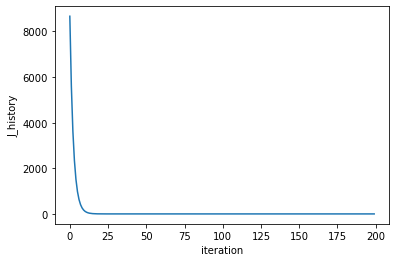

In [74]:
fig, ax1 = plt.subplots()
ax1.set_ylabel("J_history")
ax1.set_xlabel("iteration")
plt.plot(J_history )

In [75]:
from sklearn.metrics import r2_score
r2_score(y, X[:,0]*theta[0][0] + X[:,1]*theta[1][0] + X[:,2]*theta[2][0]+X[:,3]*theta[3][0]   )

0.9795760466240039